### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [ ]:
data = pd.read_csv('data/coupons.csv')

In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

=== Missing Values Report ===
                      Missing Count  Missing %
car                           12576      99.15
Bar                             107       0.84
CoffeeHouse                     217       1.71
CarryAway                       151       1.19
RestaurantLessThan20            130       1.02
Restaurant20To50                189       1.49

=== Missing Values Heatmap ===


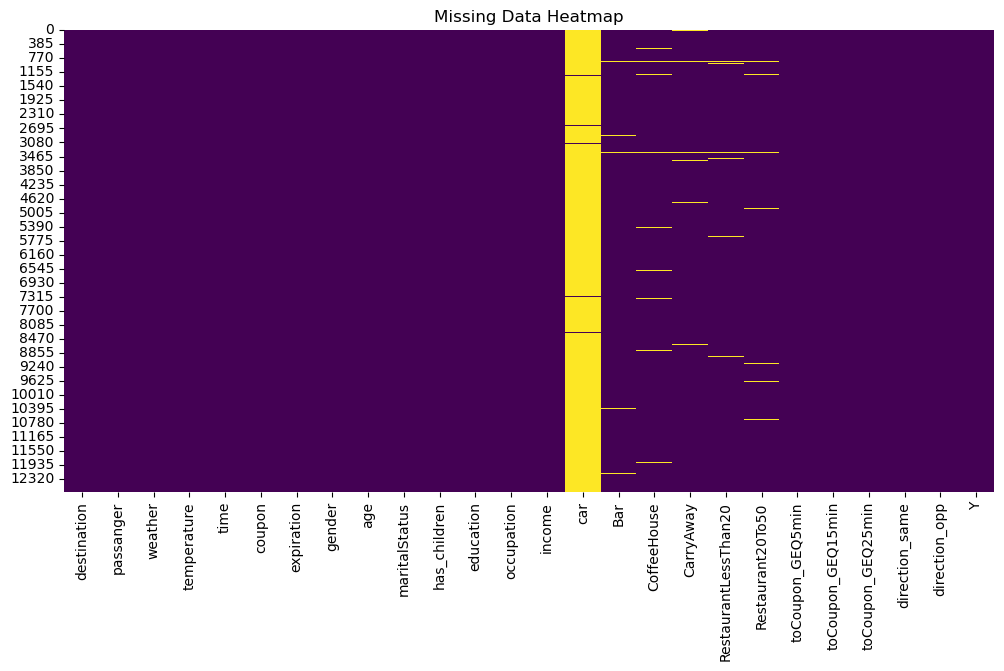


=== Duplicate Rows ===
Number of duplicate rows: 74

=== Unique Values in Key Categorical Columns ===

Column 'passanger' unique values (4):
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']

Column 'coupon' unique values (5):
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']

Column 'weather' unique values (3):
['Sunny' 'Rainy' 'Snowy']

Column 'gender' unique values (2):
['Female' 'Male']

Column 'maritalStatus' unique values (5):
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']

Column 'destination' unique values (3):
['No Urgent Place' 'Home' 'Work']

Column 'time' unique values (5):
['2PM' '10AM' '6PM' '7AM' '10PM']

=== Value Counts for Ordinal Columns ===

Value counts in 'CoffeeHouse':
CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
NaN       217
Name: count, dtype: int64

Value counts in 'CarryAway':
CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
NaN       151
Na

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def investigate_data_issues(df):
    """
    Investigates missing and problematic data in the given DataFrame.
    Prints summary reports and visualizations for:
    - Missing values count and percentage
    - Duplicate rows count
    - Unique values in key categorical columns (for typos/inconsistencies)
    - Value counts for ordinal columns with text ranges
    - Data types of each column

    Parameters:
        df (pd.DataFrame): The input DataFrame to investigate

    Returns:
        None
    """

    print("=== Missing Values Report ===")
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    missing_percent = (missing / len(df)) * 100
    missing_report = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_percent.round(2)})
    if missing_report.empty:
        print("No missing values found.")
    else:
        print(missing_report)

    print("\n=== Missing Values Heatmap ===")
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title("Missing Data Heatmap")
    plt.show()

    print("\n=== Duplicate Rows ===")
    duplicate_count = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicate_count}")

    print("\n=== Unique Values in Key Categorical Columns ===")
    columns_to_check = ['passanger', 'coupon', 'weather', 'gender', 'maritalStatus', 'destination', 'time']
    for col in columns_to_check:
        if col in df.columns:
            unique_vals = df[col].unique()
            print(f"\nColumn '{col}' unique values ({len(unique_vals)}):")
            print(unique_vals)
        else:
            print(f"\nColumn '{col}' not found in dataframe.")

    print("\n=== Value Counts for Ordinal Columns ===")
    ordinal_cols = ['CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
    for col in ordinal_cols:
        if col in df.columns:
            print(f"\nValue counts in '{col}':")
            print(df[col].value_counts(dropna=False))
        else:
            print(f"\nColumn '{col}' not found in dataframe.")

    print("\n=== Data Types ===")
    print(df.dtypes)

# Example: After loading your data
data = pd.read_csv('data/coupons.csv')
investigate_data_issues(data)

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
def clean_coupon_data(df):
    """
    Cleans the coupon dataset by:
    - Dropping 'car' column (too many missing values)
    - Mapping ordinal string columns to numeric values
    - Imputing missing values in those columns with 0

    Parameters:
        df (pd.DataFrame): Input DataFrame

    Returns:
        pd.DataFrame: Cleaned DataFrame
    """

    # Drop 'car' column if it exists
    if 'car' in df.columns:
        df = df.drop(columns=['car'])
        print("Dropped 'car' column due to high missing values.")

    # Define mapping for ordinal columns
    ordinal_map = {
        'never': 0,
        'less1': 0.5,
        '1~3': 2,
        '4~8': 6,
        'gt8': 9
    }

    ordinal_cols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

    for col in ordinal_cols:
        if col in df.columns:
            df[col] = df[col].map(ordinal_map)
            df[col] = df[col].fillna(0)
            print(f"Mapped and imputed missing values in '{col}'.")
        else:
            print(f"Column '{col}' not found in the DataFrame.")

    return df

# Example usage:
data = pd.read_csv('data/coupons.csv')
data = clean_coupon_data(data)


Dropped 'car' column due to high missing values.
Mapped and imputed missing values in 'Bar'.
Mapped and imputed missing values in 'CoffeeHouse'.
Mapped and imputed missing values in 'CarryAway'.
Mapped and imputed missing values in 'RestaurantLessThan20'.
Mapped and imputed missing values in 'Restaurant20To50'.


4. What proportion of the total observations chose to accept the coupon?



In [6]:
def coupon_acceptance_rate(df):
    """
    Calculates and prints the proportion of customers who accepted the coupon.

    Parameters:
        df (pd.DataFrame): Input DataFrame with 'Y' column indicating acceptance (1 = accepted, 0 = rejected)

    Returns:
        float: Proportion of accepted coupons
    """
    acceptance_rate = df['Y'].mean()
    print(f"Proportion of customers who accepted the coupon: {acceptance_rate:.2%}")
    return acceptance_rate

acceptance = coupon_acceptance_rate(data)

Proportion of customers who accepted the coupon: 56.84%


5. Use a bar plot to visualize the `coupon` column.

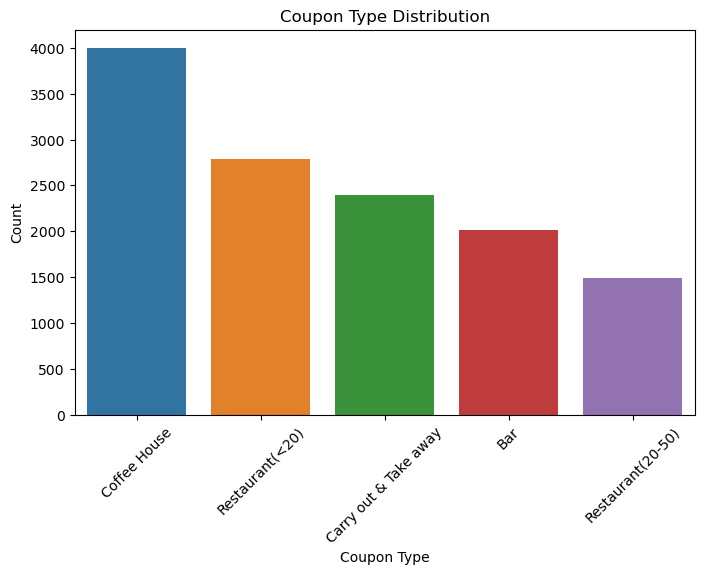

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_coupon_distribution(df):
    """
    Creates a bar plot to visualize the count of each coupon type in the 'coupon' column.

    Parameters:
        df (pd.DataFrame): Input DataFrame with a 'coupon' column.

    Returns:
        None
    """
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x='coupon', order=df['coupon'].value_counts().index)
    plt.title('Coupon Type Distribution')
    plt.xlabel('Coupon Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

plot_coupon_distribution(data)

6. Use a histogram to visualize the temperature column.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


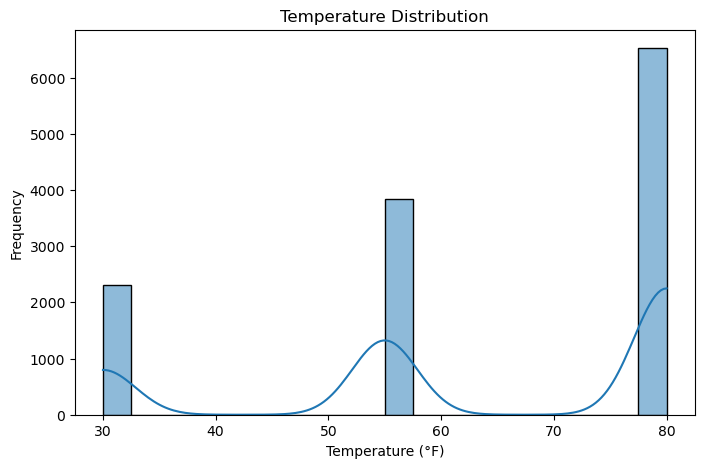

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_temperature_histogram(df):
    """
    Plots a histogram to visualize the distribution of the 'temperature' column.

    Parameters:
        df (pd.DataFrame): Input DataFrame with a 'temperature' column.

    Returns:
        None
    """
    plt.figure(figsize=(8,5))
    sns.histplot(df['temperature'], bins=20, kde=True)
    plt.title('Temperature Distribution')
    plt.xlabel('Temperature (°F)')
    plt.ylabel('Frequency')
    plt.show()

plot_temperature_histogram(data)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [9]:
def filter_bar_coupons(df):
    """
    Creates a new DataFrame containing only rows with 'Bar' coupons.

    Parameters:
        df (pd.DataFrame): Input DataFrame with a 'coupon' column.

    Returns:
        pd.DataFrame: Filtered DataFrame with only bar coupons.
    """
    bar_coupons_df = df[df['coupon'] == 'Bar'].copy()
    print(f"Filtered DataFrame contains {len(bar_coupons_df)} rows with Bar coupons.")
    return bar_coupons_df

bar_data = filter_bar_coupons(data)

Filtered DataFrame contains 2017 rows with Bar coupons.


2. What proportion of bar coupons were accepted?


In [11]:
def bar_coupon_acceptance_rate(df):
    """
    Calculates and prints the proportion of accepted Bar coupons in the given DataFrame.

    Parameters:
        df (pd.DataFrame): DataFrame filtered for Bar coupons with 'Y' column indicating acceptance (1 = accepted, 0 = rejected)

    Returns:
        float: Proportion of accepted Bar coupons
    """
    acceptance_rate = df['Y'].mean()
    print(f"Proportion of Bar coupons accepted: {acceptance_rate:.2%}")
    return acceptance_rate

bar_acceptance = bar_coupon_acceptance_rate(bar_data)

Proportion of Bar coupons accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [12]:
def compare_bar_visits_acceptance(df):
    """
    Compares acceptance rates between customers who went to a bar 3 or fewer times per month 
    vs those who went more than 3 times.

    Parameters:
        df (pd.DataFrame): DataFrame filtered for Bar coupons with numeric 'Bar' column and 'Y' acceptance column.

    Returns:
        dict: Acceptance rates for both groups
    """
    # Group 1: 3 or fewer visits
    group_3_or_less = df[df['Bar'] <= 3]
    acceptance_3_or_less = group_3_or_less['Y'].mean()

    # Group 2: More than 3 visits
    group_more_than_3 = df[df['Bar'] > 3]
    acceptance_more_than_3 = group_more_than_3['Y'].mean()

    print(f"Acceptance rate (3 or fewer visits/month): {acceptance_3_or_less:.2%}")
    print(f"Acceptance rate (more than 3 visits/month): {acceptance_more_than_3:.2%}")

    return {
        '3_or_fewer': acceptance_3_or_less,
        'more_than_3': acceptance_more_than_3
    }
compare_bar_visits_acceptance(bar_data)

Acceptance rate (3 or fewer visits/month): 37.07%
Acceptance rate (more than 3 visits/month): 76.88%


{'3_or_fewer': 0.37073707370737075, 'more_than_3': 0.7688442211055276}

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [13]:
def compare_bar_visits_age_acceptance(df):
    """
    Compare acceptance rates between drivers who go to a bar more than once a month and are over 25
    vs all others.

    Parameters:
        df (pd.DataFrame): DataFrame filtered for Bar coupons with 'Bar', 'age', and 'Y' columns.

    Returns:
        dict: Acceptance rates for both groups
    """

    # Convert age to numeric if not already, coerce errors to NaN
    df['age'] = pd.to_numeric(df['age'], errors='coerce')

    # Define group 1 condition
    group1 = df[(df['Bar'] > 1) & (df['age'] > 25)]
    group2 = df.drop(group1.index)

    acceptance_group1 = group1['Y'].mean()
    acceptance_group2 = group2['Y'].mean()

    print(f"Acceptance rate (bar visits > 1/month AND age > 25): {acceptance_group1:.2%}")
    print(f"Acceptance rate (all others): {acceptance_group2:.2%}")

    return {
        'bar_visits_gt_1_and_age_gt_25': acceptance_group1,
        'others': acceptance_group2
    }
compare_bar_visits_age_acceptance(bar_data)

Acceptance rate (bar visits > 1/month AND age > 25): 69.97%
Acceptance rate (all others): 34.86%


{'bar_visits_gt_1_and_age_gt_25': 0.6997167138810199,
 'others': 0.3485576923076923}

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [14]:
def compare_bar_visits_passenger_occupation_acceptance(df):
    """
    Compares acceptance rates between:
    - Drivers who visit bars >1/month, passengers NOT 'Kid(s)', 
      and occupation NOT in ['Farming', 'Fishing', 'Forestry']
    vs all others.

    Parameters:
        df (pd.DataFrame): DataFrame with 'Bar', 'passanger', 'occupation', and 'Y' columns.

    Returns:
        dict: Acceptance rates for both groups
    """
    # Normalize passenger column name if needed
    passenger_col = 'passanger' if 'passanger' in df.columns else 'passenger'

    # Standardize passenger entries and occupation to lowercase to avoid case issues
    df[passenger_col] = df[passenger_col].str.strip().str.lower()
    df['occupation'] = df['occupation'].str.strip().str.lower()

    excluded_occupations = ['farming', 'fishing', 'forestry']

    group1 = df[
        (df['Bar'] > 1) &
        (df[passenger_col] != 'kid(s)') &
        (~df['occupation'].isin(excluded_occupations))
    ]

    group2 = df.drop(group1.index)

    acceptance_group1 = group1['Y'].mean()
    acceptance_group2 = group2['Y'].mean()

    print(f"Acceptance rate (bar visits >1/month, passengers NOT kids, occupation NOT farming/fishing/forestry): {acceptance_group1:.2%}")
    print(f"Acceptance rate (all others): {acceptance_group2:.2%}")

    return {
        'group1': acceptance_group1,
        'group2': acceptance_group2
    }
compare_bar_visits_passenger_occupation_acceptance(bar_data)

Acceptance rate (bar visits >1/month, passengers NOT kids, occupation NOT farming/fishing/forestry): 71.32%
Acceptance rate (all others): 29.60%


{'group1': 0.7132486388384754, 'group2': 0.296043656207367}

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [17]:
def compare_complex_groups_acceptance(df):
    """
    Compares acceptance rates between three groups and the rest:
    
    Group 1: Bar visits > 1, passengers not 'Kid(s)', maritalStatus not 'Widowed'  
    Group 2: Bar visits > 1, age < 30  
    Group 3: RestaurantLessThan20 visits > 4, income < 50K  
    Group 4: All others

    Parameters:
        df (pd.DataFrame): DataFrame with necessary columns.

    Returns:
        dict: Acceptance rates for all four groups.
    """
    # Normalize columns, lower-case & strip whitespace for string columns
    passenger_col = 'passanger' if 'passanger' in df.columns else 'passenger'
    
    df[passenger_col] = df[passenger_col].str.strip().str.lower()
    df['maritalStatus'] = df['maritalStatus'].str.strip().str.lower()
    df['income'] = df['income'].str.strip().str.lower()

    # Convert age to numeric
    df['age'] = pd.to_numeric(df['age'], errors='coerce')

    # Map income to numeric threshold (assuming income is categorical like 'Less than $12500', '$12500 - $24999', etc.)
    # Let's interpret incomes less than $50K roughly as categories that include 'less than $50000'
    # If income is numeric, you can convert differently
    def income_under_50k(val):
        if pd.isna(val):
            return False
        val = val.replace(',', '').replace('$', '')
        # A simple check: if the string contains 'less' or the numeric part is less than 50000
        if 'less' in val:
            return True
        try:
            # Extract first number from string
            num = int(''.join(filter(str.isdigit, val.split()[0])))
            return num < 50000
        except:
            return False

    df['income_under_50k'] = df['income'].apply(income_under_50k)

    # Group 1
    group1 = df[
        (df['Bar'] > 1) &
        (df[passenger_col] != 'kid(s)') &
        (df['maritalStatus'] != 'widowed')
    ]

    # Group 2
    group2 = df[
        (df['Bar'] > 1) &
        (df['age'] < 30)
    ]

    # Group 3
    group3 = df[
        (df['RestaurantLessThan20'] > 4) &
        (df['income_under_50k'])
    ]

    # All others
    combined_indices = set(group1.index) | set(group2.index) | set(group3.index)
    group4 = df.loc[~df.index.isin(combined_indices)]

    rates = {
        'Group 1': group1['Y'].mean(),
        'Group 2': group2['Y'].mean(),
        'Group 3': group3['Y'].mean(),
        'Others': group4['Y'].mean()
    }

    for group, rate in rates.items():
        print(f"Acceptance rate ({group}): {rate:.2%}")

    return rates
compare_complex_groups_acceptance(data)

Acceptance rate (Group 1): 62.31%
Acceptance rate (Group 2): 62.85%
Acceptance rate (Group 3): 60.07%
Acceptance rate (Others): 54.31%


{'Group 1': 0.6231060606060606,
 'Group 2': 0.6284549161758043,
 'Group 3': 0.6007020623080298,
 'Others': 0.5431492299522039}

Hypothesis on Drivers Who Accepted Bar Coupons
Based on preliminary data exploration and comparisons, we hypothesize that:

Drivers who accept bar coupons are more likely to be frequent bar visitors (more than once per month), indicating a habitual interest in bars.

Younger drivers, particularly those under the age of 30, show higher acceptance rates, possibly reflecting greater social engagement or willingness to try promotions.

Drivers accompanied by passengers other than children tend to accept bar coupons more, suggesting a social context favorable to visiting bars.

Marital status influences acceptance, with drivers who are not widowed more likely to redeem bar coupons.

Conversely, drivers with lower income who frequently dine at inexpensive restaurants are less likely to accept bar coupons, possibly prioritizing food-related offers over bar promotions.

This hypothesis suggests that demographic factors, social context, and lifestyle habits collectively influence the likelihood of accepting bar coupons

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Total Coffee House coupon rows: 3996
Overall Coffee House coupon acceptance rate: 49.92%

Acceptance rates by passenger type:
passanger
friend(s)    0.596906
partner      0.570492
kid(s)       0.483092
alone        0.437943
Name: Y, dtype: float64


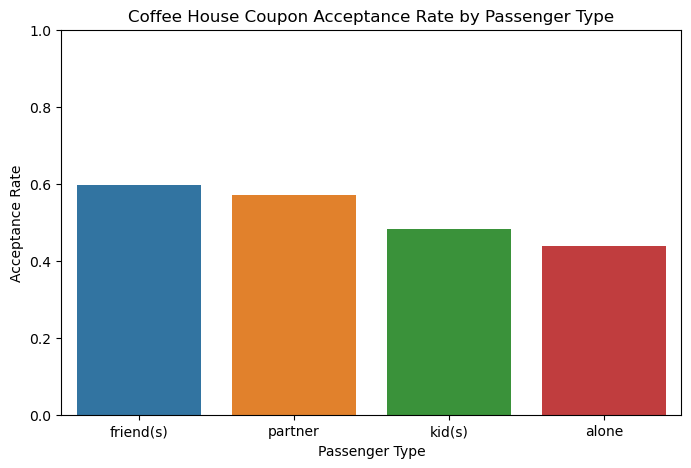

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def investigate_coffeehouse_passengers(df):
    """
    Investigates acceptance characteristics for Coffee House coupons based on passenger type.

    Parameters:
        df (pd.DataFrame): Full dataset with 'coupon', 'passanger', and 'Y' columns.

    Returns:
        None
    """
    # Filter for Coffee House coupons
    coffee_df = df[df['coupon'] == 'Coffee House'].copy()
    print(f"Total Coffee House coupon rows: {len(coffee_df)}")
    overall_acceptance = coffee_df['Y'].mean()
    print(f"Overall Coffee House coupon acceptance rate: {overall_acceptance:.2%}\n")

    # Group by passenger type and calculate acceptance rate
    acceptance_by_passenger = coffee_df.groupby('passanger')['Y'].mean().sort_values(ascending=False)
    print("Acceptance rates by passenger type:")
    print(acceptance_by_passenger)

    # Plot acceptance rate by passenger type
    plt.figure(figsize=(8,5))
    sns.barplot(x=acceptance_by_passenger.index, y=acceptance_by_passenger.values)
    plt.title('Coffee House Coupon Acceptance Rate by Passenger Type')
    plt.xlabel('Passenger Type')
    plt.ylabel('Acceptance Rate')
    plt.ylim(0,1)
    plt.show()

investigate_coffeehouse_passengers(data)
